In [1]:
import cx_Oracle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dsn_tns = cx_Oracle.makedsn('localhost', '1521', service_name='orcl')
conn = cx_Oracle.connect(user=r'*****', password='*****', dsn=dsn_tns)

In [4]:
c = conn.cursor()
c.execute('select * from crimes') 
for row in c:
    pass
#conn.close()

In [5]:
df_sql=pd.read_sql('''
select * from crimes
''',conn)
df_sql.head()

,MONTH,FORCE_ID,FORCES,NEIGHBOURHOOD,BURGLARY,ROBBERY,VEHICLE_CRIME,VIOLENT_CRIME,ANTISOCIAL_BEHAVIOUR,CRIMINAL_DAMAGE_AND_ARSON,SHOPLIFTING
0,2013-06,1,Avon and Somerset Constabulary,JN310,1,0,2,0,0,0,0
1,2013-06,1,Avon and Somerset Constabulary,FW004,0,0,0,3,2,1,0
2,2013-06,1,Avon and Somerset Constabulary,JC205,0,0,3,2,16,1,0
3,2013-06,1,Avon and Somerset Constabulary,JW110,1,0,0,0,4,1,0
4,2013-06,1,Avon and Somerset Constabulary,JW112,0,0,2,0,9,1,0


In [17]:
df_sqls=pd.read_sql('''
select * from CRIME_JSON_THIRD
''',conn)
df_sqls.head()

,OTHER_CRIMES


In [7]:
type(df_sqls.OTHER_CRIMES[0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [8]:
df=pd.DataFrame()

In [11]:
c = conn.cursor()
c.execute('select * from CRIME_JSON_SECOND') # use triple quotes if you want to spread your query across multiple lines
for row in c:
    df_tmp = pd.DataFrame([[row[0].read()]],
                        columns=["other_crimes"])
    df = df.append(df_tmp, ignore_index=True)

In [12]:
df.head()

""


In [13]:
df=df.replace('\n',' ',regex=True)

In [14]:
import string
import re

'''remove=string.punctuation
remove = remove.replace(":", "") # don't remove hyphens
remove = remove.replace(",", "")
pattern = r"[{}]".format(remove)
'''

'remove=string.punctuation\nremove = remove.replace(":", "") # don\'t remove hyphens\nremove = remove.replace(",", "")\npattern = r"[{}]".format(remove)\n'

In [15]:
pattern=['{','}','"','"']

In [16]:
df=df.replace(pattern,'',regex=True)

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
import numpy as np
def get_force_id(other_crimes):
    
    try:
        return other_crimes.split('Force_id')[1].split(',')[0].split(':')[1].strip()
    except:
        return False
def get_neighbourhood(other_crimes):
    try:
        return other_crimes.split('Neighbourhood')[1].split(',')[0].split(':')[1].strip()
    except:
        return False
def get_public_disorder(other_crimes):
    try:
        return other_crimes.split('Public disorder and weapons')[1].split(',')[0].split(':')[1].strip()
    except:
        return False
def get_other_crimes(other_crimes):
    try:
        return other_crimes.split('Other crime')[1].split(',')[0].split(':')[1].strip()
    except:
        return False

In [14]:
df['FORCE_ID']=df.other_crimes.apply(get_force_id).astype(int)
df['NEIGHBOURHOOD']=df.other_crimes.apply(get_neighbourhood)
df['PUBLIC_DISORDER_AND_WEAPONS']=df.other_crimes.apply(get_public_disorder).astype(int)
df['OTHER_CRIME']=df.other_crimes.apply(get_other_crimes).astype(int)

In [15]:
df.drop('other_crimes',axis=1,inplace=True)

In [16]:
df.head()

,FORCE_ID,NEIGHBOURHOOD,PUBLIC_DISORDER_AND_WEAPONS,OTHER_CRIME
0,1,JN310,0,0
1,1,FW004,0,0
2,1,JC205,0,0
3,1,JW110,0,0
4,1,JW112,0,0


In [17]:
df.dtypes

FORCE_ID                        int32
NEIGHBOURHOOD                  object
PUBLIC_DISORDER_AND_WEAPONS     int32
OTHER_CRIME                     int32
dtype: object

In [18]:
df_sql.dtypes

MONTH                        object
FORCE_ID                      int64
FORCES                       object
NEIGHBOURHOOD                object
BURGLARY                      int64
ROBBERY                       int64
VEHICLE_CRIME                 int64
VIOLENT_CRIME                 int64
ANTISOCIAL_BEHAVIOUR          int64
CRIMINAL_DAMAGE_AND_ARSON     int64
SHOPLIFTING                   int64
dtype: object

In [19]:
df_comb=pd.merge(df_sql,df,how='left',on=['NEIGHBOURHOOD','FORCE_ID'])

In [20]:
df_comb.head()

,MONTH,FORCE_ID,FORCES,NEIGHBOURHOOD,BURGLARY,ROBBERY,VEHICLE_CRIME,VIOLENT_CRIME,ANTISOCIAL_BEHAVIOUR,CRIMINAL_DAMAGE_AND_ARSON,SHOPLIFTING,PUBLIC_DISORDER_AND_WEAPONS,OTHER_CRIME
0,2013-06,1,Avon and Somerset Constabulary,JN310,1,0,2,0,0,0,0,0.0,0.0
1,2013-06,1,Avon and Somerset Constabulary,FW004,0,0,0,3,2,1,0,0.0,0.0
2,2013-06,1,Avon and Somerset Constabulary,JC205,0,0,3,2,16,1,0,0.0,0.0
3,2013-06,1,Avon and Somerset Constabulary,JW110,1,0,0,0,4,1,0,0.0,0.0
4,2013-06,1,Avon and Somerset Constabulary,JW112,0,0,2,0,9,1,0,0.0,0.0


In [21]:
df_comb.tail()

,MONTH,FORCE_ID,FORCES,NEIGHBOURHOOD,BURGLARY,ROBBERY,VEHICLE_CRIME,VIOLENT_CRIME,ANTISOCIAL_BEHAVIOUR,CRIMINAL_DAMAGE_AND_ARSON,SHOPLIFTING,PUBLIC_DISORDER_AND_WEAPONS,OTHER_CRIME
461,2013-06,1,Avon and Somerset Constabulary,FS005,0,0,0,0,2,1,0,NaN,NaN
462,2013-06,1,Avon and Somerset Constabulary,GT008,1,0,3,2,8,0,0,NaN,NaN
463,2013-06,1,Avon and Somerset Constabulary,GT009,0,0,3,0,4,0,0,NaN,NaN
464,2013-06,1,Avon and Somerset Constabulary,GT006,0,0,0,1,0,0,0,NaN,NaN
465,2013-06,1,Avon and Somerset Constabulary,GT007,1,0,2,1,17,0,1,NaN,NaN


In [22]:
df=df_comb.dropna()

In [23]:
# df=df.set_index('MONTH')

In [24]:
df['no_of_overall_crime']=df.iloc[:,4:].sum(axis=1)

D:\installations\anaconda\envs\tensorflows\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df.head()

,MONTH,FORCE_ID,FORCES,NEIGHBOURHOOD,BURGLARY,ROBBERY,VEHICLE_CRIME,VIOLENT_CRIME,ANTISOCIAL_BEHAVIOUR,CRIMINAL_DAMAGE_AND_ARSON,SHOPLIFTING,PUBLIC_DISORDER_AND_WEAPONS,OTHER_CRIME,no_of_overall_crime
0,2013-06,1,Avon and Somerset Constabulary,JN310,1,0,2,0,0,0,0,0.0,0.0,3.0
1,2013-06,1,Avon and Somerset Constabulary,FW004,0,0,0,3,2,1,0,0.0,0.0,6.0
2,2013-06,1,Avon and Somerset Constabulary,JC205,0,0,3,2,16,1,0,0.0,0.0,22.0
3,2013-06,1,Avon and Somerset Constabulary,JW110,1,0,0,0,4,1,0,0.0,0.0,6.0
4,2013-06,1,Avon and Somerset Constabulary,JW112,0,0,2,0,9,1,0,0.0,0.0,12.0


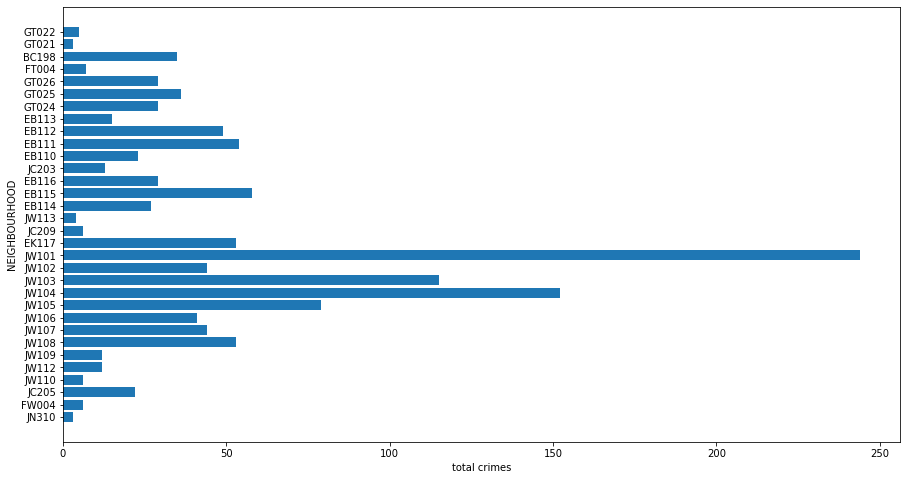

In [33]:
plt.figure(figsize=(15,8))
plt.barh('NEIGHBOURHOOD','no_of_overall_crime',data=df);
plt.xlabel('total crimes')
plt.ylabel('NEIGHBOURHOOD')
plt.show()

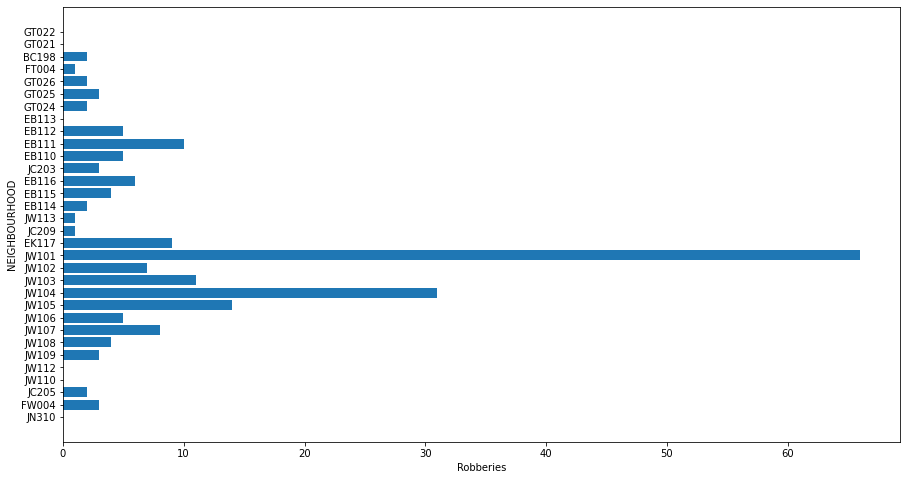

In [38]:
plt.figure(figsize=(15,8))
plt.barh('NEIGHBOURHOOD','VIOLENT_CRIME',data=df);
plt.xlabel('Robberies')
plt.ylabel('NEIGHBOURHOOD')
plt.show()